# 

### based on the given dataset from the bank we need to predict whether the customer will leave the bank in future or not

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [14]:
df.duplicated().sum()

0

In [17]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [18]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [20]:
df["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [21]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [22]:
df.drop(columns = ["RowNumber","CustomerId","Surname"],inplace=True)

In [23]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [25]:
df =pd.get_dummies(df, columns=["Geography","Gender"],drop_first=True)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [28]:
x = df.drop(columns = ["Exited"])
y = df["Exited"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.3,random_state= 12)


In [32]:
x_train.shape

(7000, 11)

In [33]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)



In [36]:
!pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=9cbc0a69367f5041d9c585013ce71479f3a274f7ce62dc66fba753b1ff136575
  Stored in directory: c:\users\anils\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor


In [38]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [60]:
model = Sequential()

model.add(Dense(11,activation="relu",input_dim = 11))
model.add(Dense(11,activation= "relu"))
model.add(Dense(1,activation= "relu"))


In [61]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 11)                132       
                                                                 
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 dense_4 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [69]:
model.compile(loss= "binary_crossentropy", optimizer= "Adam",metrics = ["accuracy"])


In [70]:
history = model.fit(x_train_scaled,y_train,epochs = 100,validation_split=0.2)

Epoch 1/100
175/175 [==============================] - 1s 3ms/step - loss: 0.3717 - accuracy: 0.8550 - val_loss: 0.4400 - val_accuracy: 0.8550
Epoch 2/100
175/175 [==============================] - 0s 2ms/step - loss: 0.3585 - accuracy: 0.8575 - val_loss: 0.4282 - val_accuracy: 0.8536
Epoch 3/100
175/175 [==============================] - 0s 2ms/step - loss: 0.3563 - accuracy: 0.8591 - val_loss: 0.4421 - val_accuracy: 0.8564
Epoch 4/100
175/175 [==============================] - 0s 2ms/step - loss: 0.3557 - accuracy: 0.8586 - val_loss: 0.4507 - val_accuracy: 0.8579
Epoch 5/100
175/175 [==============================] - 0s 2ms/step - loss: 0.3588 - accuracy: 0.8596 - val_loss: 0.4419 - val_accuracy: 0.8593
Epoch 6/100
175/175 [==============================] - 0s 2ms/step - loss: 0.3563 - accuracy: 0.8579 - val_loss: 0.4477 - val_accuracy: 0.8536
Epoch 7/100
175/175 [==============================] - 0s 2ms/step - loss: 0.3591 - accuracy: 0.8614 - val_loss: 0.4229 - val_accuracy: 0.8557

Epoch 58/100
175/175 [==============================] - 0s 2ms/step - loss: 0.3345 - accuracy: 0.8637 - val_loss: 0.4749 - val_accuracy: 0.8543
Epoch 59/100
175/175 [==============================] - 0s 2ms/step - loss: 0.3647 - accuracy: 0.8562 - val_loss: 0.4526 - val_accuracy: 0.8350
Epoch 60/100
175/175 [==============================] - 1s 3ms/step - loss: 0.3635 - accuracy: 0.8571 - val_loss: 0.4376 - val_accuracy: 0.8536
Epoch 61/100
175/175 [==============================] - 0s 3ms/step - loss: 0.3460 - accuracy: 0.8598 - val_loss: 0.4396 - val_accuracy: 0.8507
Epoch 62/100
175/175 [==============================] - 0s 2ms/step - loss: 0.3410 - accuracy: 0.8609 - val_loss: 0.4531 - val_accuracy: 0.8600
Epoch 63/100
175/175 [==============================] - 0s 2ms/step - loss: 0.3373 - accuracy: 0.8637 - val_loss: 0.4470 - val_accuracy: 0.8529
Epoch 64/100
175/175 [==============================] - 0s 2ms/step - loss: 0.3369 - accuracy: 0.8630 - val_loss: 0.4705 - val_accuracy:

In [64]:
model.layers[0].get_weights()

[array([[-0.26906738,  0.10729647,  0.04989961,  0.09015782, -0.00741089,
         -0.11541788,  0.0972774 , -0.5252576 ,  0.25351962, -0.1288155 ,
          0.04309682],
        [-0.29731864,  0.22203355,  0.46901527, -0.38923475,  0.18619096,
         -0.01490061, -0.1321817 ,  0.39748332, -0.25670898,  0.3606306 ,
         -0.28172904],
        [-0.28646493,  0.02536209,  0.03645245, -0.20571084, -0.05511335,
         -0.07410609, -0.15206265, -0.11205161, -0.08641669, -0.04782232,
          0.00463608],
        [-0.14138998, -0.08580252, -0.1341794 , -0.15722448,  0.10247024,
          0.5521708 ,  0.15556847,  0.22126117,  0.26251096, -0.21664447,
          0.06498789],
        [-0.23137397, -0.60317844,  0.04887189,  0.20502421,  0.83406055,
          0.2217024 , -0.66244996,  0.08742218, -0.35243964, -0.5883718 ,
         -0.12445064],
        [-0.32917988,  0.00265564,  0.21461055, -0.1819628 ,  0.03327727,
         -0.09471347, -0.3888446 ,  0.04770955, -0.14058472, -0.0667614

In [65]:
y_log = model.predict(x_test_scaled)

94/94 [==============================] - 0s 1ms/step


In [66]:
y_pred = np.where(y_log>.5 ,1,0)

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8456666666666667

In [72]:
history.history

{'loss': [0.3716598451137543,
  0.35850122570991516,
  0.3562970459461212,
  0.35570642352104187,
  0.3587612211704254,
  0.356279194355011,
  0.3591042757034302,
  0.3555830717086792,
  0.35286182165145874,
  0.3846034109592438,
  0.36215826869010925,
  0.3629436492919922,
  0.3474748432636261,
  0.34456193447113037,
  0.3449873626232147,
  0.35007444024086,
  0.3584451377391815,
  0.3499899208545685,
  0.3442240357398987,
  0.34463441371917725,
  0.34544503688812256,
  0.3449838161468506,
  0.3445698618888855,
  0.3630726933479309,
  0.3497188985347748,
  0.357138454914093,
  0.3705630898475647,
  0.43923524022102356,
  0.3847215175628662,
  0.36417368054389954,
  0.38782960176467896,
  0.3712019622325897,
  0.3585955798625946,
  0.3543962240219116,
  0.3515719175338745,
  0.34912219643592834,
  0.34752321243286133,
  0.3458614945411682,
  0.34412649273872375,
  0.343073308467865,
  0.3419927954673767,
  0.3405739963054657,
  0.3398100733757019,
  0.3395383656024933,
  0.338296651840

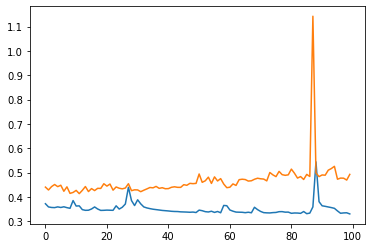

In [74]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

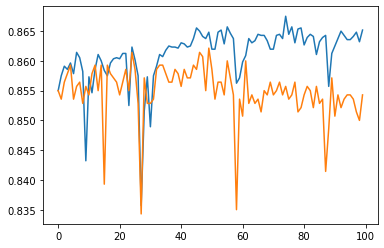

In [75]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])